In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
features = pd.read_csv("../data/illinois_cat_placeid_embeddings.csv")

In [3]:
features

,place_id,category,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,...,embed_20,embed_21,embed_22,embed_23,embed_24,embed_25,embed_26,embed_27,embed_28,embed_29
0,100000,Food,-1.106990,1.695394,-0.352455,0.550980,0.146137,1.545278,0.938652,0.849073,...,-0.681969,-2.810601,-0.760893,-0.380810,0.002483,1.008336,-0.895668,0.341835,0.270152,0.085232
1,100001,Entertainment,0.177996,1.669917,0.068777,-0.574866,-1.048563,0.773501,1.005774,0.780850,...,-0.460939,-2.119114,-1.932540,1.170861,-0.022550,1.002309,-1.698906,-0.282906,0.207848,1.678978
2,100002,Shopping,-0.190198,1.372632,-0.641344,0.998297,-0.280328,1.310907,0.979769,1.133603,...,-0.519958,-2.609643,-0.856798,1.225909,-0.621344,1.252816,-0.425828,-0.481567,-1.050429,1.241152
3,100003,Shopping,-0.669281,1.370998,0.618457,-0.609681,-0.444301,0.763132,0.323572,0.079365,...,0.317704,-1.538891,-1.478541,0.139267,-0.690691,1.008585,-1.752020,-0.033525,0.942736,1.261053
4,100004,Shopping,-1.037584,1.334695,0.018132,0.908984,0.152172,1.505842,0.607555,0.539131,...,0.056067,-2.538732,-0.721616,0.434534,-1.232192,1.510328,-0.797053,-0.142708,-0.422573,1.104364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33451,133006,Community,-1.174245,1.976406,-0.599251,0.623971,0.286810,1.674195,0.774147,0.870733,...,-0.388535,-2.603630,-0.743914,-0.352838,-0.499360,0.928912,-0.868725,0.264832,0.210774,0.075962
33452,133007,Community,-0.644139,2.302307,-0.704546,0.475973,-0.357313,1.610228,0.923996,1.532907,...,-0.480431,-2.634308,-1.209980,0.494981,-0.528678,0.820743,-1.055072,-0.365515,0.013998,0.513726
33453,133008,Community,-1.005436,1.867685,-0.374842,0.598883,0.055498,1.629489,0.915322,0.886606,...,-0.456997,-2.798000,-0.935697,0.047332,-0.488172,1.152176,-0.998173,0.148542,0.005758,0.506728
33454,133009,Travel,-0.965790,1.904962,-0.851075,1.079701,0.105838,1.686672,0.741979,1.500416,...,-0.465872,-2.640030,-0.539302,0.074901,-0.566498,0.817466,-0.422394,-0.348782,-0.183396,0.024146


In [4]:
features["category"].unique()

array(['Food', 'Entertainment', 'Shopping', 'Outdoors', 'Community',
       'Travel', 'Nightlife'], dtype=object)

In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score
)
from sklearn.preprocessing import LabelEncoder

# Supondo que 'features' é seu DataFrame contendo a coluna 'category'
# Exemplo de carregamento dos dados
# features = pd.read_csv('seu_arquivo.csv')

# Codificar a coluna 'category' para valores inteiros
le = LabelEncoder()
features['category'] = le.fit_transform(features['category'])

# Dividir variáveis em X e Y
X = features.drop(columns=['category'])  # Todas as colunas menos 'category'
Y = features['category']                  # A coluna 'category' como alvo

# Certifique-se de que Y tenha apenas valores dentro do range esperado (0 a 6)
assert (Y.min() >= 0) and (Y.max() <= 6), "A coluna 'category' deve conter valores entre 0 e 6."

# Criação do KFold
kf = KFold(n_splits=5, shuffle=True)

# Listas para acumular métricas
results = {
    "accuracy": [],
    "weighted_precision": [],
    "weighted_recall": [],
    "weighted_f1": [],
    "macro_precision": [],
    "macro_recall": [],
    "macro_f1": [],
}

0        2
1        1
2        5
3        5
4        5
        ..
33451    0
33452    0
33453    0
33454    6
33455    4
Name: category, Length: 33456, dtype: int64

In [ ]:
for train_index, test_index in kf.split(X, Y):
    X_train, Y_train = X.iloc[train_index], Y.iloc[train_index]
    X_test, Y_test = X.iloc[test_index], Y.iloc[test_index]

    model = svm.SVC(kernel="linear", decision_function_shape='ovo', class_weight='balanced')
    model.fit(X_train, Y_train)

    y_predicted = model.predict(X_test)

    # Cálculo das métricas
    results["accuracy"].append(accuracy_score(Y_test, y_predicted))
    results["weighted_precision"].append(precision_score(Y_test, y_predicted, average='weighted'))
    results["weighted_recall"].append(recall_score(Y_test, y_predicted, average='weighted'))
    results["weighted_f1"].append(f1_score(Y_test, y_predicted, average='weighted'))
    results["macro_precision"].append(precision_score(Y_test, y_predicted, average='macro'))
    results["macro_recall"].append(recall_score(Y_test, y_predicted, average='macro'))
    results["macro_f1"].append(f1_score(Y_test, y_predicted, average='macro'))

# Resultado médio das métricas
print("Resultados Médios da Validação Cruzada:")
print(f"Accuracy: {sum(results['accuracy']) / len(results['accuracy'])}")	

In [5]:
le = LabelEncoder()
features['category'] = le.fit_transform(features['category'])

# Dividir variáveis em X e Y
X = features.drop(columns=['place_id', 'category'])  # Todas as colunas menos 'place_id' e 'category'
Y = features['category']                              # A coluna 'category' como alvo

# Criação do KFold
kf = KFold(n_splits=5, shuffle=True)

# Listas para acumular métricas
results = {
    "accuracy": [],
    "weighted_precision": [],
    "weighted_recall": [],
    "weighted_f1": [],
    "macro_precision": [],
    "macro_recall": [],
    "macro_f1": [],
}

In [6]:
for train_index, test_index in kf.split(X, Y):
    X_train, Y_train = X.iloc[train_index], Y.iloc[train_index]
    X_test, Y_test = X.iloc[test_index], Y.iloc[test_index]

    model = svm.SVC(kernel="linear", decision_function_shape='ovo', class_weight='balanced')
    model.fit(X_train, Y_train)

    y_predicted = model.predict(X_test)

    # Cálculo das métricas
    results["accuracy"].append(accuracy_score(Y_test, y_predicted))
    results["weighted_precision"].append(precision_score(Y_test, y_predicted, average='weighted', zero_division=0))
    results["weighted_recall"].append(recall_score(Y_test, y_predicted, average='weighted', zero_division=0))
    results["weighted_f1"].append(f1_score(Y_test, y_predicted, average='weighted', zero_division=0))
    results["macro_precision"].append(precision_score(Y_test, y_predicted, average='macro', zero_division=0))
    results["macro_recall"].append(recall_score(Y_test, y_predicted, average='macro', zero_division=0))
    results["macro_f1"].append(f1_score(Y_test, y_predicted, average='macro', zero_division=0))

In [7]:
# Resultado médio das métricas
print("Resultados Médios da Validação Cruzada:")
print(f"Accuracy: {sum(results['accuracy']) / len(results['accuracy'])}")
print(f"Weighted Precision: {sum(results['weighted_precision']) / len(results['weighted_precision'])}")
print(f"Weighted Recall: {sum(results['weighted_recall']) / len(results['weighted_recall'])}")
print(f"Weighted F1 Score: {sum(results['weighted_f1']) / len(results['weighted_f1'])}")
print(f"Macro Precision: {sum(results['macro_precision']) / len(results['macro_precision'])}")
print(f"Macro Recall: {sum(results['macro_recall']) / len(results['macro_recall'])}")
print(f"Macro F1 Score: {sum(results['macro_f1']) / len(results['macro_f1'])}")

Resultados Médios da Validação Cruzada:
Accuracy: 0.4672703329797822
Weighted Precision: 0.5678307558337372
Weighted Recall: 0.4672703329797822
Weighted F1 Score: 0.4756908925992486
Macro Precision: 0.4280486023170121
Macro Recall: 0.5601457878334231
Macro F1 Score: 0.4435699194305574


In [8]:
kf = KFold(n_splits=5, shuffle=True)
split = kf.split(features.iloc[:, 0:99], features.iloc[:, 100])
fscores, precisions, recalls = [], [], []

acc = []
precision = []
recall = []
w_avg_f = []
m_avg_f = []

w_avg_p = []
m_avg_p = []

w_avg_r = []
m_avg_r = []

for train_index, test_index in split:
  
    X_train, Y_train = features.loc[train_index].iloc[:,
                                                        :99], features.loc[train_index].iloc[:, 100]
    x_test, y_test = features.loc[test_index].iloc[:,
                                                    :99], features.loc[test_index].iloc[:, 100]

    model = svm.SVC(
        kernel="linear", decision_function_shape='ovo',  class_weight="balanced")
    model.fit(X_train, Y_train)

    y_predicted = model.predict(x_test)
    
    precision, recall, fscore, support = score(y_test, y_predicted)
    acc.append(accuracy_score(y_test, y_predicted))

    fscores.append(fscore)
    precisions.append(precision)
    recalls.append(recall)

    w_avg_f.append(f1_score(y_test, y_predicted, average='weighted'))
    m_avg_f.append(f1_score(y_test, y_predicted, average='macro'))

    w_avg_p.append(precision_score(
        y_test, y_predicted, average='weighted'))
    m_avg_p.append(precision_score(y_test, y_predicted, average='macro'))

    w_avg_r.append(recall_score(y_test, y_predicted, average='weighted'))
    m_avg_r.append(recall_score(y_test, y_predicted, average='macro'))
    class_labels = sorted(set(y_test))


ValueError: could not convert string to float: 'Food'

In [30]:
name_columns = [x for x in class_labels]
metrics_f = pd.DataFrame(fscores, columns = name_columns)
metrics_p = pd.DataFrame(precisions, columns = name_columns)
metrics_r = pd.DataFrame(recalls, columns = name_columns)

metrics_f["accuracy"] = acc
metrics_f["macro avg"] = m_avg_f
metrics_f["weighted avg"] = w_avg_f

metrics_p["weighted avg"] = w_avg_p
metrics_p["macro avg"] = m_avg_p

metrics_r["weighted avg"] = w_avg_r
metrics_r["macro avg"] = m_avg_r

print("Métricas precision:")
display(metrics_p)

print("Métricas recall:")
display(metrics_r)

print("Métricas fscore:")
display(metrics_f)

NameError: name 'class_labels' is not defined

In [39]:
metrics_f.columns

Index([0, 1, 2, 3, 4, 5, 6, 'accuracy', 'macro avg', 'weighted avg'], dtype='object')

<AxesSubplot: xlabel='variable', ylabel='value'>

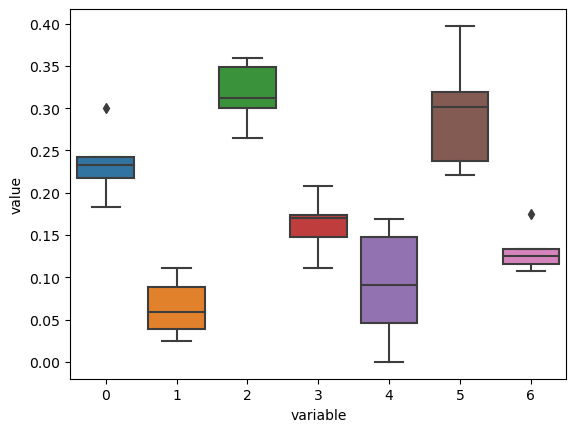

In [42]:
sns.boxplot(x="variable", y="value", data=metrics_f[[0, 1, 2, 3, 4, 5, 6]].melt())